<a href="https://colab.research.google.com/github/Cann-Emma/portfolio/blob/main/ANOVA_SAT_Score_by_NYCBorough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PACKAGES

In [ ]:
install.packages('psych')
library(psych)
install.packages('car')
library(car)
install.packages('pwr')
library(pwr)

In [ ]:
library(tidyverse)
library(ggplot2)

In [1]:
nyc_schools= read.csv('schools.csv')

In [ ]:
glimpse(nyc_schools)
unique(nyc_schools)

## EXPLORATORY ANALYSIS

In [11]:
head(nyc_schools, 4)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,"New Explorations into Science, Technology and Math High School",Manhattan,M022,657,601,601,NA
2,Essex Street Academy,Manhattan,M445,395,411,387,78.9
3,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
4,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9


In [13]:
describe(nyc_schools)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
school_name*,1,375,188.00000,108.397417,188.0,188.000000,139.36440,1.0,375,374.0,0.00000000,-1.2096042,5.5976185
borough*,2,375,2.42400,1.139453,2.0,2.372093,1.48260,1.0,5,4.0,0.30057485,-0.9715269,0.0588411
building_code*,3,375,118.19467,71.459101,112.0,118.352159,99.33420,1.0,233,232.0,0.02286125,-1.3691180,3.6901321
average_math,4,375,432.94400,71.952373,415.0,421.644518,48.92580,317.0,754,437.0,1.71118989,3.3770099,3.7156045
average_reading,5,375,424.50400,61.881069,413.0,416.252492,41.51280,302.0,697,395.0,1.61755598,3.5499180,3.1955247
average_writing,6,375,418.45867,64.548599,403.0,409.425249,35.58240,284.0,693,409.0,1.66988656,3.6666681,3.3332753
percent_tested,7,355,64.97634,18.747634,64.8,65.189474,21.20118,18.5,100,81.5,-0.08736937,-0.8203423,0.9950211


In [19]:
nyc_schools1= nyc_schools%>%mutate(total_SAT= (average_math + average_reading + average_writing))

In [20]:
nyc_schools1%>%group_by(borough)%>%summarise(avg_math= mean(average_math), avg_reading= mean(average_reading),avg_writing= mean(average_writing), avg_SAT= mean(total_SAT))

borough,avg_math,avg_reading,avg_writing,avg_SAT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bronx,404.3571,402.5204,395.8469,1202.724
Brooklyn,416.4037,410.7615,403.0917,1230.257
Manhattan,455.8876,444.9326,439.3146,1340.135
Queens,462.3623,443.2609,439.8551,1345.478
Staten Island,486.2000,478.5000,474.3000,1439.000


## PRE POWER ANALYSIS

In [34]:
pwr.anova.test(k=4, n=NULL, sig.level=.05, f= sqrt(.06/(1-.06)), power=.80)


     Balanced one-way analysis of variance power calculation 

              k = 4
              n = 43.69098
              f = 0.2526456
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


## DATA PREPARATION

In [90]:
Bronx= nyc_schools1%>%select(borough, total_SAT)%>%filter(borough== 'Bronx')%>%slice(1:60)
Brooklyn= nyc_schools1%>%select(borough, total_SAT)%>%filter(borough== 'Brooklyn')%>%slice(1:60)
Queens= nyc_schools1%>%select(borough, total_SAT)%>%filter(borough== 'Queens')%>%slice(1:60)
Manhattan= nyc_schools1%>%select(borough, total_SAT)%>%filter(borough== 'Manhattan')%>%slice(1:60)

In [91]:
# Wide Dat
scores_wide= data.frame(Bronx= Bronx, Brooklyn= Brooklyn, Queens= Queens, Manhattan= Manhattan)
head(scores_wide,4)

,Bronx.borough,Bronx.total_SAT,Brooklyn.borough,Brooklyn.total_SAT,Queens.borough,Queens.total_SAT,Manhattan.borough,Manhattan.total_SAT
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>
1,Bronx,1164,Brooklyn,1182,Queens,1335,Manhattan,1859
2,Bronx,1227,Brooklyn,1099,Queens,1313,Manhattan,1193
3,Bronx,1202,Brooklyn,1217,Queens,1143,Manhattan,1261
4,Bronx,1100,Brooklyn,1176,Queens,1346,Manhattan,1529


In [92]:
# Long Dat
scores_long= data.frame(Borough= c(Bronx$borough, Brooklyn$borough, Manhattan$borough, Queens$borough), total_SAT= c(Bronx$total_SAT, Brooklyn$total_SAT, Manhattan$total_SAT, Queens$total_SAT))

## DESCRIPTIVE STATISTICS

In [93]:
summary(scores_wide)

 Bronx.borough      Bronx.total_SAT Brooklyn.borough   Brooklyn.total_SAT
 Length:60          Min.   : 995    Length:60          Min.   : 926      
 Class :character   1st Qu.:1128    Class :character   1st Qu.:1127      
 Mode  :character   Median :1167    Mode  :character   Median :1182      
                    Mean   :1178                       Mean   :1211      
                    3rd Qu.:1228                       3rd Qu.:1268      
                    Max.   :1466                       Max.   :1804      
 Queens.borough     Queens.total_SAT Manhattan.borough  Manhattan.total_SAT
 Length:60          Min.   : 978     Length:60          Min.   :1005       
 Class :character   1st Qu.:1237     Class :character   1st Qu.:1174       
 Mode  :character   Median :1314     Mode  :character   Median :1274       
                    Mean   :1360                        Mean   :1349       
                    3rd Qu.:1436                        3rd Qu.:1516       
                    Max.  

In [94]:
describe(scores_wide)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bronx.borough*,1,60,1.000,0.00000,1.0,1.000,0.0000,1,1,0,NaN,NaN,0.00000
Bronx.total_SAT,2,60,1177.800,80.25337,1167.0,1176.271,70.4235,995,1466,471,0.5183569,1.6642442,10.36067
Brooklyn.borough*,3,60,1.000,0.00000,1.0,1.000,0.0000,1,1,0,NaN,NaN,0.00000
Brooklyn.total_SAT,4,60,1211.217,138.88577,1181.5,1196.146,90.4386,926,1804,878,1.5616389,4.2765593,17.93008
Queens.borough*,5,60,1.000,0.00000,1.0,1.000,0.0000,1,1,0,NaN,NaN,0.00000
Queens.total_SAT,6,60,1359.783,193.57179,1313.5,1332.583,151.2252,978,1981,1003,1.3870657,2.2351223,24.99001
Manhattan.borough*,7,60,1.000,0.00000,1.0,1.000,0.0000,1,1,0,NaN,NaN,0.00000
Manhattan.total_SAT,8,60,1348.683,230.12889,1274.5,1323.625,170.4990,1005,1914,909,0.8790469,-0.3224032,29.70951


## STATISTICAL ASSUMPTIONS

In [95]:
shapiro.test(scores_wide$Manhattan.total_SAT)


	Shapiro-Wilk normality test

data:  scores_wide$Manhattan.total_SAT
W = 0.89489, p-value = 8.615e-05


In [96]:
shapiro.test(scores_wide$Brooklyn.total_SAT)


	Shapiro-Wilk normality test

data:  scores_wide$Brooklyn.total_SAT
W = 0.87799, p-value = 2.272e-05


In [97]:
shapiro.test(scores_wide$Bronx.total_SAT)


	Shapiro-Wilk normality test

data:  scores_wide$Bronx.total_SAT
W = 0.96593, p-value = 0.09199


In [98]:
shapiro.test(scores_wide$Queens.total_SAT)


	Shapiro-Wilk normality test

data:  scores_wide$Queens.total_SAT
W = 0.87322, p-value = 1.587e-05


In [99]:
leveneTest(y= total_SAT~Borough,data=scores_long)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,9.176948,9.112722e-06
,236,NA,NA


Violation of both statistical assumptions

##DATA VISUALIZATION

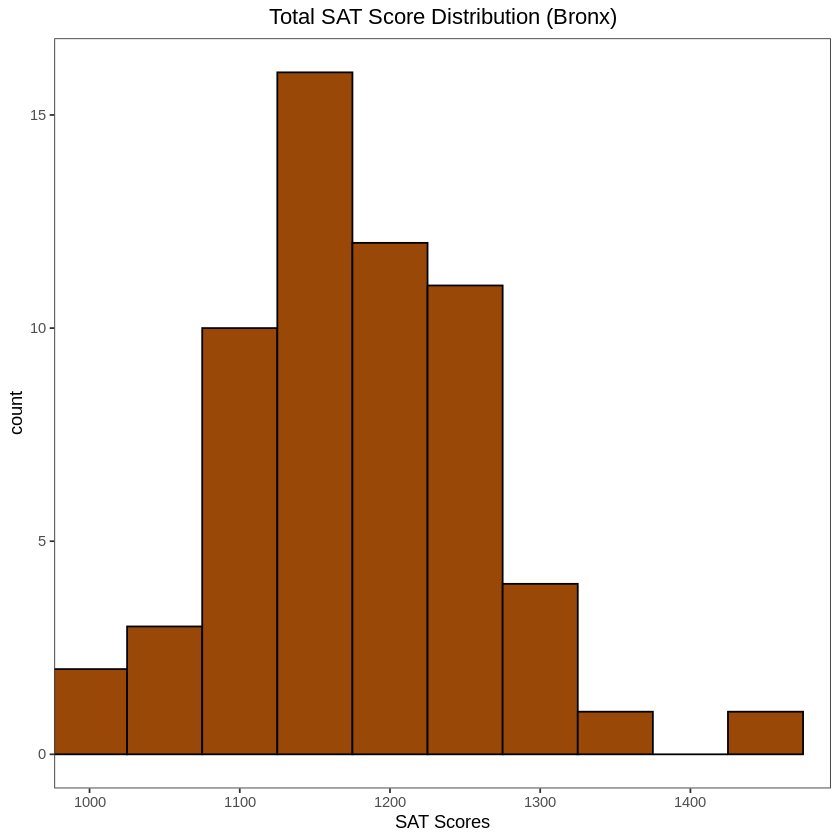

In [122]:
ggplot(data = scores_wide) + geom_histogram(aes(x = Bronx.total_SAT),color = "black", fill = "#994808", binwidth = 50) + xlab("SAT Scores") + coord_cartesian(xlim=c(1000,1470)) +ggtitle("Total SAT Score Distribution (Bronx)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

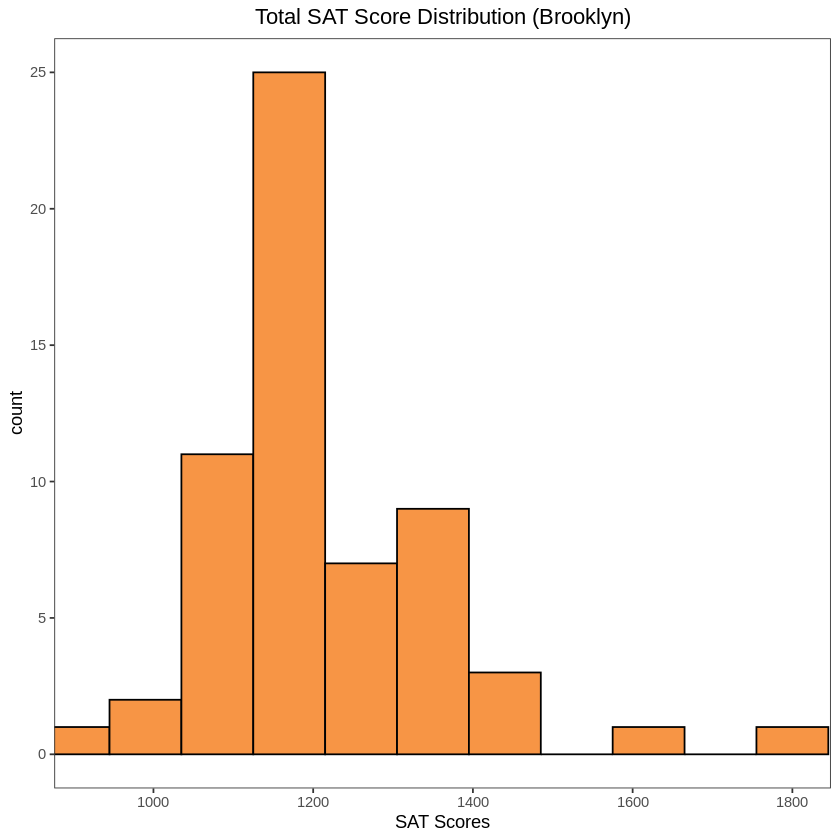

In [123]:
ggplot(data = scores_wide) + geom_histogram(aes(x = Brooklyn.total_SAT),color = "black", fill = "#f79545", binwidth = 90) + xlab("SAT Scores") + coord_cartesian(xlim=c(920,1804)) +ggtitle("Total SAT Score Distribution (Brooklyn)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

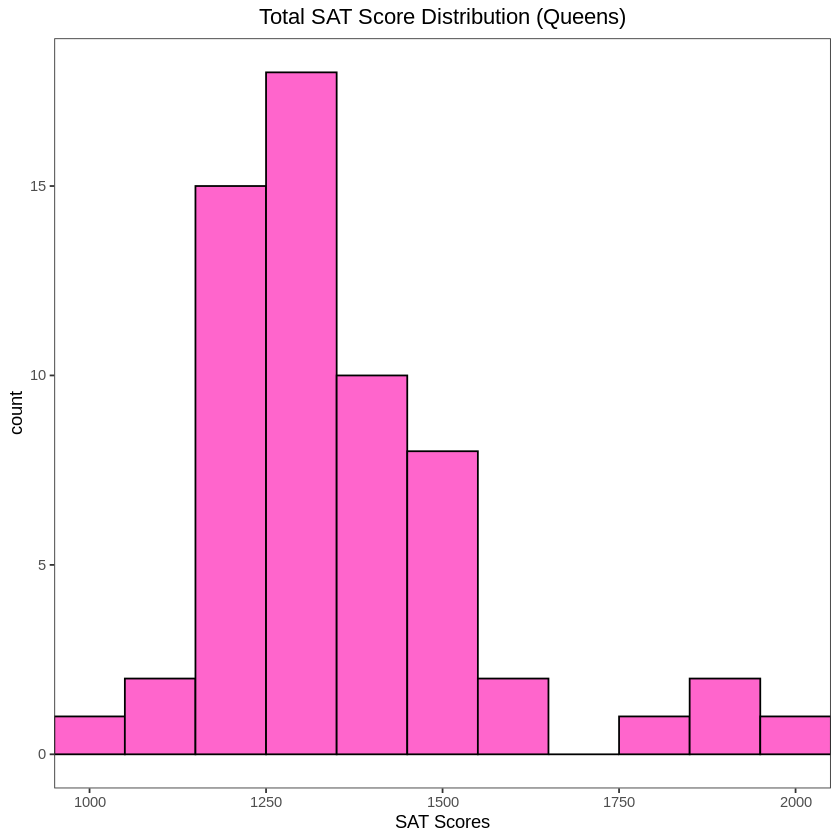

In [127]:
ggplot(data = scores_wide) + geom_histogram(aes(x = Queens.total_SAT),color = "black", fill = "#ff65cc", binwidth = 100) + xlab("SAT Scores") + coord_cartesian(xlim=c(1000,2000)) +ggtitle("Total SAT Score Distribution (Queens)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

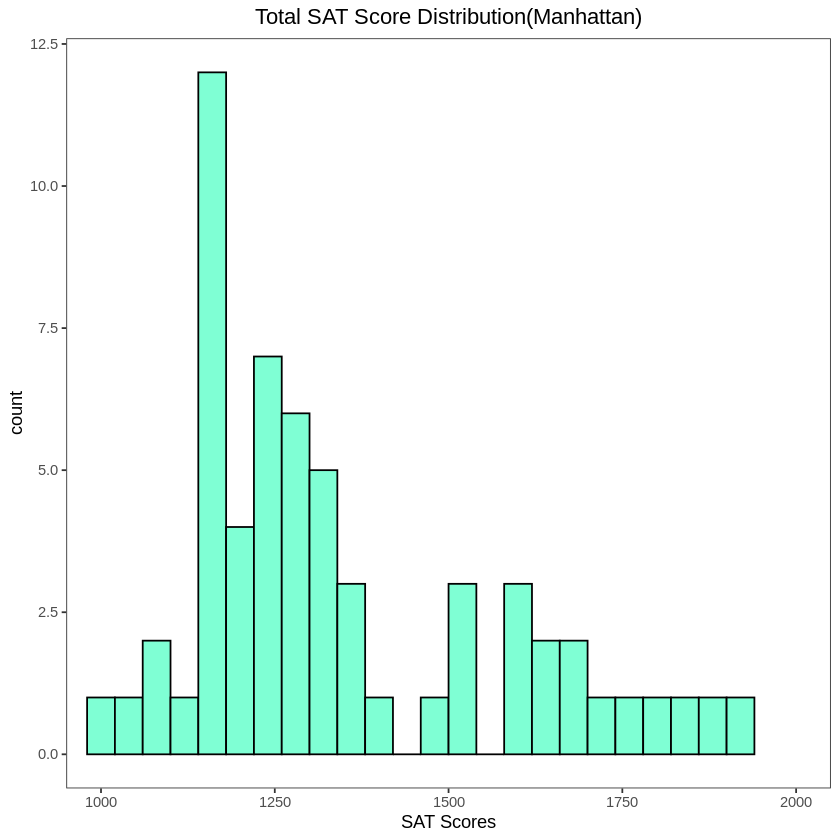

In [129]:
ggplot(data = scores_wide) + geom_histogram(aes(x = Manhattan.total_SAT),color = "black", fill = "aquamarine", binwidth = 40) + xlab("SAT Scores") + coord_cartesian(xlim=c(1000,2000)) +ggtitle("Total SAT Score Distribution(Manhattan)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

## DATA TRANSFORMATION

In [136]:
Square_dat= scores_wide%>%mutate(Bronx_rt= sqrt(Bronx.total_SAT), Manhattan_rt= sqrt(Manhattan.total_SAT), Queens_rt= sqrt(Queens.total_SAT),Brooklyn_rt= sqrt(Brooklyn.total_SAT))

In [137]:
Square_dat

Bronx.borough,Bronx.total_SAT,Brooklyn.borough,Brooklyn.total_SAT,Queens.borough,Queens.total_SAT,Manhattan.borough,Manhattan.total_SAT,Bronx_rt,Manhattan_rt,Queens_rt,Brooklyn_rt
<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Bronx,1164,Brooklyn,1182,Queens,1335,Manhattan,1859,34.11744,43.11612,36.53765,34.38023
Bronx,1227,Brooklyn,1099,Queens,1313,Manhattan,1193,35.02856,34.53983,36.23534,33.15117
Bronx,1202,Brooklyn,1217,Queens,1143,Manhattan,1261,34.66987,35.51056,33.80828,34.88553
Bronx,1100,Brooklyn,1176,Queens,1346,Manhattan,1529,33.16625,39.10243,36.68787,34.29286
Bronx,1203,Brooklyn,1407,Queens,1431,Manhattan,1197,34.68429,34.59769,37.82856,37.51000
Bronx,1142,Brooklyn,1219,Queens,1456,Manhattan,1914,33.79349,43.74929,38.15757,34.91418
Bronx,1124,Brooklyn,1319,Queens,1245,Manhattan,1165,33.52611,34.13210,35.28456,36.31804
Bronx,1134,Brooklyn,1238,Queens,1839,Manhattan,1245,33.67492,35.28456,42.88356,35.18522
Bronx,1053,Brooklyn,1216,Queens,1157,Manhattan,1144,32.44996,33.82307,34.01470,34.87119


In [145]:
Log_dat= scores_wide%>%mutate(Bronx_log= log(Bronx.total_SAT), Manhattan_log= log(Manhattan.total_SAT), Queens_log= log(Queens.total_SAT),Brooklyn_log= log(Brooklyn.total_SAT))

In [ ]:
Log_dat= scores_wide%>%mutate(Bronx_log= log(Bronx.total_SAT), Manhattan_log= log(Manhattan.total_SAT), Queens_log= log(Queens.total_SAT),Brooklyn_log= log(Brooklyn.total_SAT))

In [170]:
Log_dat2= scores_long%>%mutate(Score_log= log(total_SAT))
Squared_dat2= scores_long%>%mutate(Score_sqrt= sqrt(total_SAT))

In [177]:
Inv_dat= scores_wide%>%mutate(Bronx_inv= 1/(Bronx.total_SAT), Manhattan_inv= 1/(Manhattan.total_SAT), Queens_inv= 1/(Queens.total_SAT),Brooklyn_inv= 1/(Brooklyn.total_SAT))
Inv_dat2= scores_long%>%mutate(Score_inv= 1/(total_SAT))

In [167]:
shapiro.test(Square_dat$Bronx_rt)


	Shapiro-Wilk normality test

data:  Square_dat$Bronx_rt
W = 0.97194, p-value = 0.1813


In [175]:
shapiro.test(Inv_dat$Brooklyn_inv)


	Shapiro-Wilk normality test

data:  Inv_dat$Brooklyn_inv
W = 0.95609, p-value = 0.03039


In [ ]:
leveneTest(y= Score_log~Borough,data=Log_dat2)
leveneTest(y=Score_sqrt~Borough,data=Squared_dat2)
leveneTest(y=Score_inv~Borough,data=Inv_dat2)

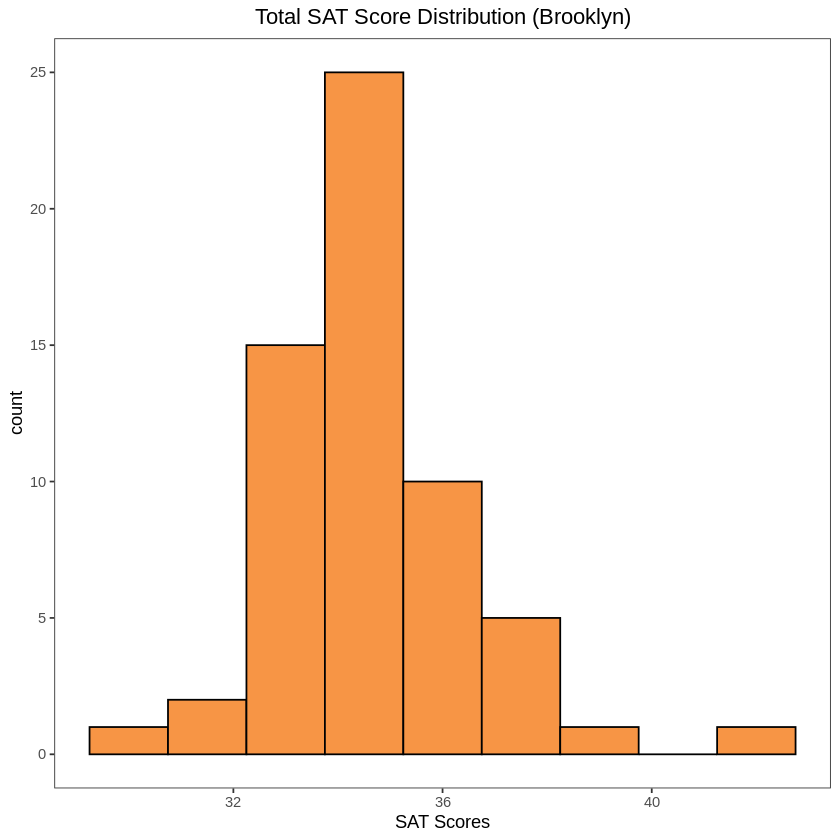

In [155]:
ggplot(data = Square_dat) + geom_histogram(aes(x = Brooklyn_rt),color = "black", fill = "#f79545", binwidth = 1.5) + xlab("SAT Scores")+ggtitle("Total SAT Score Distribution (Brooklyn)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

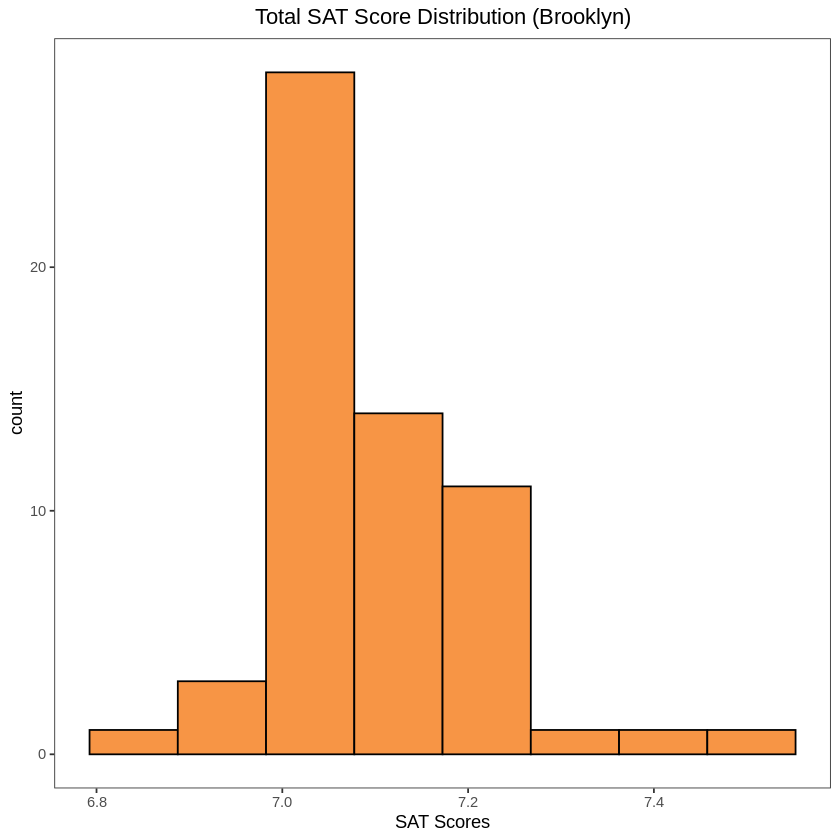

In [192]:
ggplot(data = Log_dat) + geom_histogram(aes(x = Brooklyn_log),color = "black", fill = "#f79545", binwidth = 0.095) + xlab("SAT Scores")+ggtitle("Total SAT Score Distribution (Brooklyn)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

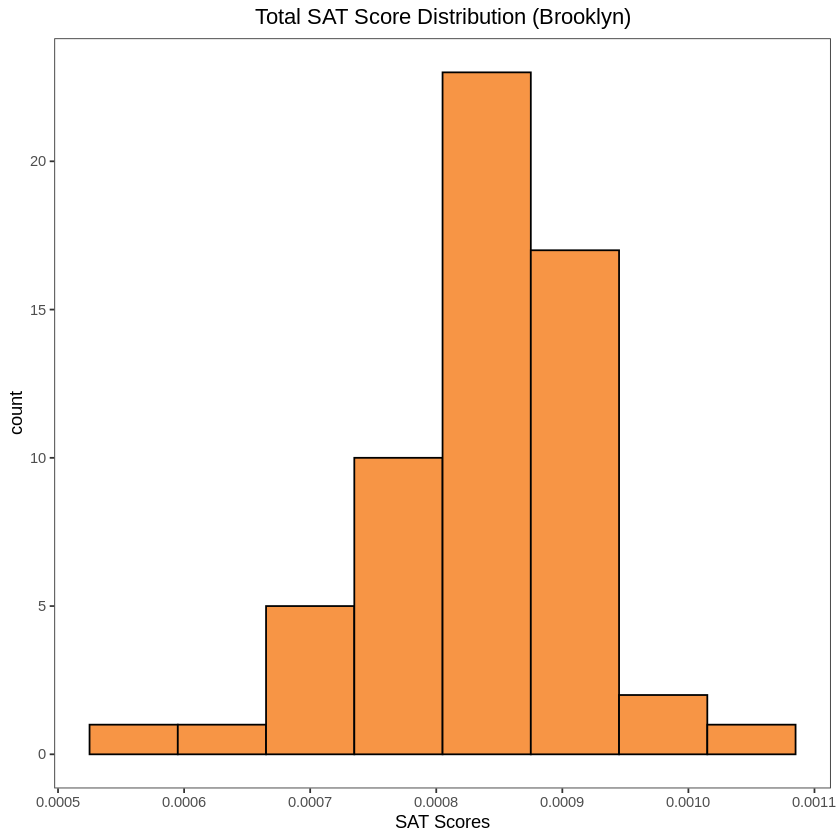

In [190]:
ggplot(data = Inv_dat) + geom_histogram(aes(x = Brooklyn_inv),color = "black", fill = "#f79545", binwidth = 0.00007) + xlab("SAT Scores")+ggtitle("Total SAT Score Distribution (Brooklyn)") + theme_bw() + theme(panel.grid = element_blank(), plot.title = element_text(hjust = 0.5))

In [198]:
scores_long= scores_long%>%mutate(Score_log= log(total_SAT))

## COMPARISON DISTRIBUTION AND CUTOFF VALUE

In [193]:
BoroughDFbetween <- 3
BoroughDFerror <- 236

In [194]:
qf(1-0.05,BoroughDFbetween,BoroughDFerror)

[1] 2.642851

## HYPOTHESIS TESTING

In [201]:
BoroughLm <- lm(Score_log~Borough,data=scores_long)
anova(BoroughLm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Borough,3,0.8646968,0.28823228,19.20672,3.534624e-11
Residuals,236,3.5416163,0.01500685,NA,NA


## EFFECT SIZE

In [207]:
BoroughSSbetween <- 0.86
BoroughSSerror <- 3.54

In [208]:
BoroughR2 <- BoroughSSbetween / (BoroughSSbetween + BoroughSSerror)
BoroughR2

[1] 0.1954545

## TUKEY'S HSD

In [202]:
install.packages('emmeans')
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’




In [205]:
BoroughComparisonMeans <- emmeans(BoroughLm, ~Borough)
contrast(BoroughComparisonMeans, method="pairwise", adjust="Tukey")

 contrast             estimate     SE  df t.ratio p.value
 Bronx - Brooklyn      -0.0243 0.0224 236  -1.087  0.6980
 Bronx - Manhattan     -0.1244 0.0224 236  -5.562  <.0001
 Bronx - Queens        -0.1369 0.0224 236  -6.120  <.0001
 Brooklyn - Manhattan  -0.1001 0.0224 236  -4.475  0.0001
 Brooklyn - Queens     -0.1126 0.0224 236  -5.033  <.0001
 Manhattan - Queens    -0.0125 0.0224 236  -0.558  0.9444

P value adjustment: tukey method for comparing a family of 4 estimates 

## POST ANALYSIS

A one-way ANOVA was used to determine whether there was a difference in the average total Score on the SAT among four boroughs in New York City(Bronx, Brooklyn, Queens, and Manhattan). As hypothesized, there was a statistically significant difference in the average SAT score among the four boroughs, F(3,236) = 19.21, p < .001. The size of the effect was R2
 = .20, a small effect, indicating 20% of the variance in total SAT score is explained by the borough a school is in. Post-hoc Tukey HSD tests indicate the average total SAT scores in Queens and Manhattan are statistically significantly greater than the average total SAT score in the Bronx and Brooklyn. While Queens schools have a higher total SAT score on average than Manhattan schools, their means were not statistically significant from each other. Further, while Brooklyn schools have a higher total SAT score on average than Bronx schools, their means were also not statistically significant from each other. See Descriptive Statistics for means and standard deviations.